In [3]:
# Imports
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
rainfall_url = ('/content/drive/MyDrive/datasets/yield_prediction/rainfall.csv')
pesticides_url = ('/content/drive/MyDrive/datasets/yield_prediction/pesticides.csv')
temperature_url = ('/content/drive/MyDrive/datasets/yield_prediction/temp.csv')
yield_url = ('/content/drive/MyDrive/datasets/yield_prediction/yield.csv')

In [5]:
# Load data
pesticides_data = pd.read_csv(pesticides_url, sep=',')
rainfall_data = pd.read_csv(rainfall_url, sep=', ')
temperature_data = pd.read_csv(temperature_url, sep=', ')
yield_data = pd.read_csv(yield_url, sep=',')

<ipython-input-5-e353946a88d2>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rainfall_data = pd.read_csv(rainfall_url, sep=', ')
<ipython-input-5-e353946a88d2>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  temperature_data = pd.read_csv(temperature_url, sep=', ')


# Data PrepaPreparation

In [7]:
rainfall_data
print(rainfall_data)
rainfall_data.info()

        Rainfall - (MM)  Year   Statistics      Country ISO3
0              55.74480  1901  Jan Average  Afghanistan  AFG
1              13.94800  1901  Feb Average  Afghanistan  AFG
2              43.84640  1901  Mar Average  Afghanistan  AFG
3              26.96100  1901  Apr Average  Afghanistan  AFG
4              52.95790  1901  May Average  Afghanistan  AFG
...                 ...   ...          ...          ...  ...
272827          2.03926  2016  Aug Average     Zimbabwe  ZWE
272828          0.48070  2016  Sep Average     Zimbabwe  ZWE
272829          9.13410  2016  Oct Average     Zimbabwe  ZWE
272830         72.95080  2016  Nov Average     Zimbabwe  ZWE
272831        148.26800  2016  Dec Average     Zimbabwe  ZWE

[272832 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rainfall - (MM)  272832 non-null

In [8]:
rainfall_data.describe()

,Rainfall - (MM),Year
count,272832.000000,272832.000000
mean,103.470868,1958.500000
std,113.231867,33.485133
min,0.000000,1901.000000
25%,24.168375,1929.750000
50%,66.431550,1958.500000
75%,149.647250,1987.250000
max,2699.190000,2016.000000


In [10]:
# Number of countries
len(rainfall_data['Country'].unique())


196

In [11]:
# Number of years (1901 - 2016)
len(rainfall_data['Year'].unique())


116

In [12]:
# One year from Afghanistan
rainfall_data.head(12)


,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Afghanistan,AFG
1,13.94800,1901,Feb Average,Afghanistan,AFG
2,43.84640,1901,Mar Average,Afghanistan,AFG
3,26.96100,1901,Apr Average,Afghanistan,AFG
4,52.95790,1901,May Average,Afghanistan,AFG
5,16.64650,1901,Jun Average,Afghanistan,AFG
6,7.38656,1901,Jul Average,Afghanistan,AFG
7,0.59306,1901,Aug Average,Afghanistan,AFG
8,4.82593,1901,Sep Average,Afghanistan,AFG
9,11.49720,1901,Oct Average,Afghanistan,AFG


In [13]:
# Rain data in years for each country
rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).sum()
rainfall_df.tail()

,Year,Country,ISO3,Rainfall - (MM),Statistics
22731,2016,Venezuela,VEN,1844.70330,Jan AverageFeb AverageMar AverageApr AverageMa...
22732,2016,Vietnam,VNM,1988.86180,Jan AverageFeb AverageMar AverageApr AverageMa...
22733,2016,Yemen,YEM,171.48137,Jan AverageFeb AverageMar AverageApr AverageMa...
22734,2016,Zambia,ZMB,803.47810,Jan AverageFeb AverageMar AverageApr AverageMa...
22735,2016,Zimbabwe,ZWE,455.13295,Jan AverageFeb AverageMar AverageApr AverageMa...


In [14]:
temperature_data.tail()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
272827,18.7555,2016,Aug Average,Zimbabwe,ZWE
272828,22.9919,2016,Sep Average,Zimbabwe,ZWE
272829,25.8664,2016,Oct Average,Zimbabwe,ZWE
272830,25.8515,2016,Nov Average,Zimbabwe,ZWE
272831,25.0693,2016,Dec Average,Zimbabwe,ZWE


In [15]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Temperature - (Celsius)  272832 non-null  float64
 1   Year                     272832 non-null  int64  
 2   Statistics               272832 non-null  object 
 3   Country                  272832 non-null  object 
 4   ISO3                     272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [16]:
temperature_data.describe()

,Temperature - (Celsius),Year
count,272832.000000,272832.000000
mean,18.631498,1958.500000
std,10.248635,33.485133
min,-34.121000,1901.000000
25%,13.231575,1929.750000
50%,22.736300,1958.500000
75%,25.797700,1987.250000
max,38.566900,2016.000000


In [17]:
# Number of countries
len(temperature_data['Country'].unique())


196

In [18]:
# Number of years (1901 - 2016)
len(temperature_data['Year'].unique())

116

In [19]:
# One year from Afghanistan
temperature_data.head(12)

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
5,22.17270,1901,Jun Average,Afghanistan,AFG
6,25.37870,1901,Jul Average,Afghanistan,AFG
7,23.66520,1901,Aug Average,Afghanistan,AFG
8,19.46550,1901,Sep Average,Afghanistan,AFG
9,11.28370,1901,Oct Average,Afghanistan,AFG


In [20]:
# Average temperature data in years for each country
temperature_df =temperature_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).sum()
temperature_df

,Year,Country,ISO3,Temperature - (Celsius),Statistics
0,1901,Afghanistan,AFG,158.07446,Jan AverageFeb AverageMar AverageApr AverageMa...
1,1901,Albania,ALB,132.37125,Jan AverageFeb AverageMar AverageApr AverageMa...
2,1901,Algeria,DZA,267.48010,Jan AverageFeb AverageMar AverageApr AverageMa...
3,1901,Andorra,AND,119.52779,Jan AverageFeb AverageMar AverageApr AverageMa...
4,1901,Angola,AGO,256.38870,Jan AverageFeb AverageMar AverageApr AverageMa...
...,...,...,...,...,...
22731,2016,Venezuela,VEN,317.73840,Jan AverageFeb AverageMar AverageApr AverageMa...
22732,2016,Vietnam,VNM,300.87790,Jan AverageFeb AverageMar AverageApr AverageMa...
22733,2016,Yemen,YEM,290.65440,Jan AverageFeb AverageMar AverageApr AverageMa...
22734,2016,Zambia,ZMB,272.84460,Jan AverageFeb AverageMar AverageApr AverageMa...


In [21]:
temperature_df.shape

(22736, 5)

In [22]:
## Yield data

In [23]:
yield_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Afghanistan,Yield,Barley,1961,hg/ha,10800
1,Crops,Afghanistan,Yield,Barley,1962,hg/ha,10800
2,Crops,Afghanistan,Yield,Barley,1963,hg/ha,10800
3,Crops,Afghanistan,Yield,Barley,1964,hg/ha,10857
4,Crops,Afghanistan,Yield,Barley,1965,hg/ha,10857
...,...,...,...,...,...,...,...
63686,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,20486
63687,Crops,Zimbabwe,Yield,Wheat,2016,hg/ha,19013
63688,Crops,Zimbabwe,Yield,Wheat,2017,hg/ha,17542
63689,Crops,Zimbabwe,Yield,Wheat,2018,hg/ha,16379


In [24]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63691 entries, 0 to 63690
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   63691 non-null  object
 1   Area     63691 non-null  object
 2   Element  63691 non-null  object
 3   Item     63691 non-null  object
 4   Year     63691 non-null  int64 
 5   Unit     63691 non-null  object
 6   Value    63691 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.4+ MB


In [25]:
yield_data.describe()

,Year,Value
count,63691.000000,6.369100e+04
mean,1992.332669,8.581113e+04
std,16.888797,1.008880e+05
min,1961.000000,0.000000e+00
25%,1978.000000,1.770700e+04
50%,1994.000000,4.705900e+04
75%,2007.000000,1.185070e+05
max,2019.000000,2.236842e+06


In [26]:
# Number of countries
len(yield_data['Area'].unique())

203

In [27]:
# Number of years (1961 - 2019)
len(yield_data['Year'].unique())

59

In [28]:
# Remove unnecessary columns
yield_df = yield_data.drop(['Domain', 'Element'], axis=1)
yield_df

,Area,Item,Year,Unit,Value
0,Afghanistan,Barley,1961,hg/ha,10800
1,Afghanistan,Barley,1962,hg/ha,10800
2,Afghanistan,Barley,1963,hg/ha,10800
3,Afghanistan,Barley,1964,hg/ha,10857
4,Afghanistan,Barley,1965,hg/ha,10857
...,...,...,...,...,...
63686,Zimbabwe,Wheat,2015,hg/ha,20486
63687,Zimbabwe,Wheat,2016,hg/ha,19013
63688,Zimbabwe,Wheat,2017,hg/ha,17542
63689,Zimbabwe,Wheat,2018,hg/ha,16379


In [29]:
## Pesticides data

In [30]:
pesticides_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1990,tonnes,121
1,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1991,tonnes,121
2,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1992,tonnes,121
3,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1993,tonnes,121
4,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...,...,...
4784,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2014,tonnes,2185
4785,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2015,tonnes,2185
4786,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2016,tonnes,2185
4787,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2017,tonnes,2185


In [31]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   4789 non-null   object
 1   Area     4789 non-null   object
 2   Element  4789 non-null   object
 3   Item     4789 non-null   object
 4   Year     4789 non-null   int64 
 5   Unit     4789 non-null   object
 6   Value    4789 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 262.0+ KB


In [32]:
pesticides_data.describe()

,Year,Value
count,4789.000000,4.789000e+03
mean,2004.142619,2.894718e+04
std,8.302595,1.627207e+05
min,1990.000000,0.000000e+00
25%,1997.000000,9.900000e+01
50%,2004.000000,1.221000e+03
75%,2011.000000,7.420000e+03
max,2018.000000,1.815690e+06


In [33]:
# Number of countries
len(pesticides_data['Area'].unique())

172

In [34]:
# Number of years (1990 - 2018)
len(pesticides_data['Year'].unique())

29

In [35]:
# Remove unnecessary columns
pesticides_df = pesticides_data.drop(['Domain', 'Element'], axis=1)
pesticides_df

,Area,Item,Year,Unit,Value
0,Albania,Pesticides (total),1990,tonnes,121
1,Albania,Pesticides (total),1991,tonnes,121
2,Albania,Pesticides (total),1992,tonnes,121
3,Albania,Pesticides (total),1993,tonnes,121
4,Albania,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...
4784,Zimbabwe,Pesticides (total),2014,tonnes,2185
4785,Zimbabwe,Pesticides (total),2015,tonnes,2185
4786,Zimbabwe,Pesticides (total),2016,tonnes,2185
4787,Zimbabwe,Pesticides (total),2017,tonnes,2185


# Merging and Exploration

In [38]:
rainfall_df.rename({'Rainfall - (MM)': 'Rainfall (mm)'}, axis=1, inplace=True)
rainfall_df

,Year,Country,ISO3,Rainfall (mm),Statistics
0,1901,Afghanistan,AFG,250.92364,Jan AverageFeb AverageMar AverageApr AverageMa...
1,1901,Albania,ALB,1244.13740,Jan AverageFeb AverageMar AverageApr AverageMa...
2,1901,Algeria,DZA,113.45278,Jan AverageFeb AverageMar AverageApr AverageMa...
3,1901,Andorra,AND,871.31150,Jan AverageFeb AverageMar AverageApr AverageMa...
4,1901,Angola,AGO,931.01022,Jan AverageFeb AverageMar AverageApr AverageMa...
...,...,...,...,...,...
22731,2016,Venezuela,VEN,1844.70330,Jan AverageFeb AverageMar AverageApr AverageMa...
22732,2016,Vietnam,VNM,1988.86180,Jan AverageFeb AverageMar AverageApr AverageMa...
22733,2016,Yemen,YEM,171.48137,Jan AverageFeb AverageMar AverageApr AverageMa...
22734,2016,Zambia,ZMB,803.47810,Jan AverageFeb AverageMar AverageApr AverageMa...


In [39]:
temperature_df.rename({'Temperature - (Celsius)': 'Temperature (Celsius)'}, axis=1, inplace=True)
temperature_df

,Year,Country,ISO3,Temperature (Celsius),Statistics
0,1901,Afghanistan,AFG,158.07446,Jan AverageFeb AverageMar AverageApr AverageMa...
1,1901,Albania,ALB,132.37125,Jan AverageFeb AverageMar AverageApr AverageMa...
2,1901,Algeria,DZA,267.48010,Jan AverageFeb AverageMar AverageApr AverageMa...
3,1901,Andorra,AND,119.52779,Jan AverageFeb AverageMar AverageApr AverageMa...
4,1901,Angola,AGO,256.38870,Jan AverageFeb AverageMar AverageApr AverageMa...
...,...,...,...,...,...
22731,2016,Venezuela,VEN,317.73840,Jan AverageFeb AverageMar AverageApr AverageMa...
22732,2016,Vietnam,VNM,300.87790,Jan AverageFeb AverageMar AverageApr AverageMa...
22733,2016,Yemen,YEM,290.65440,Jan AverageFeb AverageMar AverageApr AverageMa...
22734,2016,Zambia,ZMB,272.84460,Jan AverageFeb AverageMar AverageApr AverageMa...


In [40]:
yield_df.rename({'Area': 'Country', 'Value': 'Yield (hg/ha)'}, axis=1, inplace=True)
# yield_df.drop('Unit', axis=1, inplace=True)
yield_df

,Country,Item,Year,Unit,Yield (hg/ha)
0,Afghanistan,Barley,1961,hg/ha,10800
1,Afghanistan,Barley,1962,hg/ha,10800
2,Afghanistan,Barley,1963,hg/ha,10800
3,Afghanistan,Barley,1964,hg/ha,10857
4,Afghanistan,Barley,1965,hg/ha,10857
...,...,...,...,...,...
63686,Zimbabwe,Wheat,2015,hg/ha,20486
63687,Zimbabwe,Wheat,2016,hg/ha,19013
63688,Zimbabwe,Wheat,2017,hg/ha,17542
63689,Zimbabwe,Wheat,2018,hg/ha,16379


In [44]:
pesticides_df.rename({'Area': 'Country', 'Value': 'Pesticides (tonnes)'}, axis=1, inplace=True)
pesticides_df.drop(['Unit', 'Item'], axis=1, inplace=True)
pesticides_df

,Country,Year,Pesticides (tonnes)
0,Albania,1990,121
1,Albania,1991,121
2,Albania,1992,121
3,Albania,1993,121
4,Albania,1994,201
...,...,...,...
4784,Zimbabwe,2014,2185
4785,Zimbabwe,2015,2185
4786,Zimbabwe,2016,2185
4787,Zimbabwe,2017,2185


In [45]:
rain_temp_df = pd.merge(rainfall_df, temperature_df, on=['Country', 'Year', 'ISO3'])
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Country', 'Year'])
rain_temp_yield_pest_df = pd.merge(rain_temp_yield_df, pesticides_df, on=['Country', 'Year'])
rain_temp_yield_pest_df.drop('ISO3', axis=1, inplace=True)
data = rain_temp_yield_pest_df[['Year', 'Country', 'Item', 'Rainfall (mm)', 'Temperature (Celsius)', 'Pesticides (tonnes)', 'Yield (hg/ha)']]
data

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
0,1990,Albania,Barley,812.23450,144.61465,121,10000
1,1990,Albania,Carrots and turnips,812.23450,144.61465,121,150000
2,1990,Albania,Cauliflowers and broccoli,812.23450,144.61465,121,171429
3,1990,Albania,Garlic,812.23450,144.61465,121,65000
4,1990,Albania,Maize,812.23450,144.61465,121,36613
...,...,...,...,...,...,...,...
25224,2016,Zimbabwe,Maize,455.13295,267.72200,2185,4405
25225,2016,Zimbabwe,Oats,455.13295,267.72200,2185,20505
25226,2016,Zimbabwe,Potatoes,455.13295,267.72200,2185,51792
25227,2016,Zimbabwe,Sweet potatoes,455.13295,267.72200,2185,27283


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25229 entries, 0 to 25228
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25229 non-null  int64  
 1   Country                25229 non-null  object 
 2   Item                   25229 non-null  object 
 3   Rainfall (mm)          25229 non-null  float64
 4   Temperature (Celsius)  25229 non-null  float64
 5   Pesticides (tonnes)    25229 non-null  int64  
 6   Yield (hg/ha)          25229 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.3+ MB


In [47]:
data.describe()

,Year,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
count,25229.000000,25229.000000,25229.000000,2.522900e+04,2.522900e+04
mean,2003.374727,973.384508,200.258886,3.494096e+04,9.514574e+04
std,7.681975,721.249911,96.105000,1.750313e+05,1.059950e+05
min,1990.000000,16.703610,-85.995870,0.000000e+00,0.000000e+00
25%,1997.000000,486.113000,119.783070,5.670000e+02,2.080800e+04
50%,2003.000000,756.758400,218.669600,2.803000e+03,5.444700e+04
75%,2010.000000,1347.522400,287.908900,1.375600e+04,1.343930e+05
max,2016.000000,4999.686400,354.492900,1.815690e+06,1.705000e+06


In [48]:
# Number of countries
len(data.Country.unique())

135

In [49]:
# Number of years (1990 - 2016)
len(data.Year.unique())

27

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25229 entries, 0 to 25228
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25229 non-null  int64  
 1   Country                25229 non-null  object 
 2   Item                   25229 non-null  object 
 3   Rainfall (mm)          25229 non-null  float64
 4   Temperature (Celsius)  25229 non-null  float64
 5   Pesticides (tonnes)    25229 non-null  int64  
 6   Yield (hg/ha)          25229 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.3+ MB


# Modelling, Training and Testing

In [72]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import time
from scipy.stats import linregress

label_encoder = LabelEncoder()

# Encode the categorical columns in the original data
data.loc[:, 'Country'] = label_encoder.fit_transform(data['Country'])
data.loc[:, 'Item'] = label_encoder.fit_transform(data['Item'])

yy = data['Yield (hg/ha)']
XX = data.drop('Yield (hg/ha)', axis=1)

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

def mean_absolute_percentage_error(yy_true, yy_pred):
    yy_true, yy_pred = np.array(yy_true), np.array(yy_pred)
    return np.mean(np.abs((yy_true - yy_pred) / yy_true)) * 100

def perform_prediction(year, country, item, rainfall, temperature, pesticides):
    # Encode categorical features
    encoded_country = label_encoder.transform([country])[0]
    encoded_item = label_encoder.transform([item])[0]

    # Create the input array
    X = np.array([[year, encoded_country, encoded_item, rainfall, temperature, pesticides]])

    # Perform prediction
    yield_prediction = random_forest_model.predict(X)*30

    return yield_prediction

def plot_regression_results(ax, yy_test, yy_pred, title, estimated_time, scores):

  # linear least-squares
  slope, intercept, rvalue, pvalue, stderr = linregress(yy_test, yy_pred)
  ax.plot([yy_test.min(), yy_test.max()], [intercept+yy_test.min()*slope, intercept+yy_test.max()*slope], '--r')

  ax.scatter(yy_test, yy_pred, alpha=0.7)

  # Display the values ​​in a box
  extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
  ax.legend([extra], [scores], loc='upper left')

  ax.set_xlabel('Actual values in tonnes')
  ax.set_ylabel('Predictes values in tonnes')
  ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))

regression_model = LinearRegression()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
random_forest_model = RandomForestRegressor()

start_time = time.time()
random_forest_model.fit(XX_train, yy_train)
yy_pred = random_forest_model.predict(XX_test)

estimated_time = time.time() - start_time
print(yy_pred, "estimated_time is: ", estimated_time)

yield_prediction = perform_prediction(2024, 13, 13, 820, 20, 2230)
print("Yield Prediction:", yield_prediction)

# multiply produced yield by 30 which is the estimate total hectres of land covered in Zimbabwe

[  8634.81 443440.56  46474.67 ...  54063.87 176948.94  21047.82] estimated_time is:  10.514110326766968
Yield Prediction: [1019738.1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[108144.98878255 127226.09044221 113498.94167014 ... 106761.74453393
 120530.46632507  73877.12312519]


<ipython-input-66-03f3c922e241>:27: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((yy_true - yy_pred) / yy_true)) * 100


[  9593. 459238.  50654. ...  62512. 175312.  19735.]


<ipython-input-66-03f3c922e241>:27: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((yy_true - yy_pred) / yy_true)) * 100


[ -6847.61788136 335932.31324395  56558.155396   ...  41256.10210989
 175277.06856691  24241.03106802]
[ 42100.4 135435.4 161691.2 ...  69758.8 149831.8  36424.2]


<ipython-input-66-03f3c922e241>:27: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((yy_true - yy_pred) / yy_true)) * 100
<ipython-input-66-03f3c922e241>:27: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((yy_true - yy_pred) / yy_true)) * 100


[  8696.73 454551.88  45253.4  ...  53168.68 180746.85  20516.3 ]


<ipython-input-66-03f3c922e241>:27: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((yy_true - yy_pred) / yy_true)) * 100


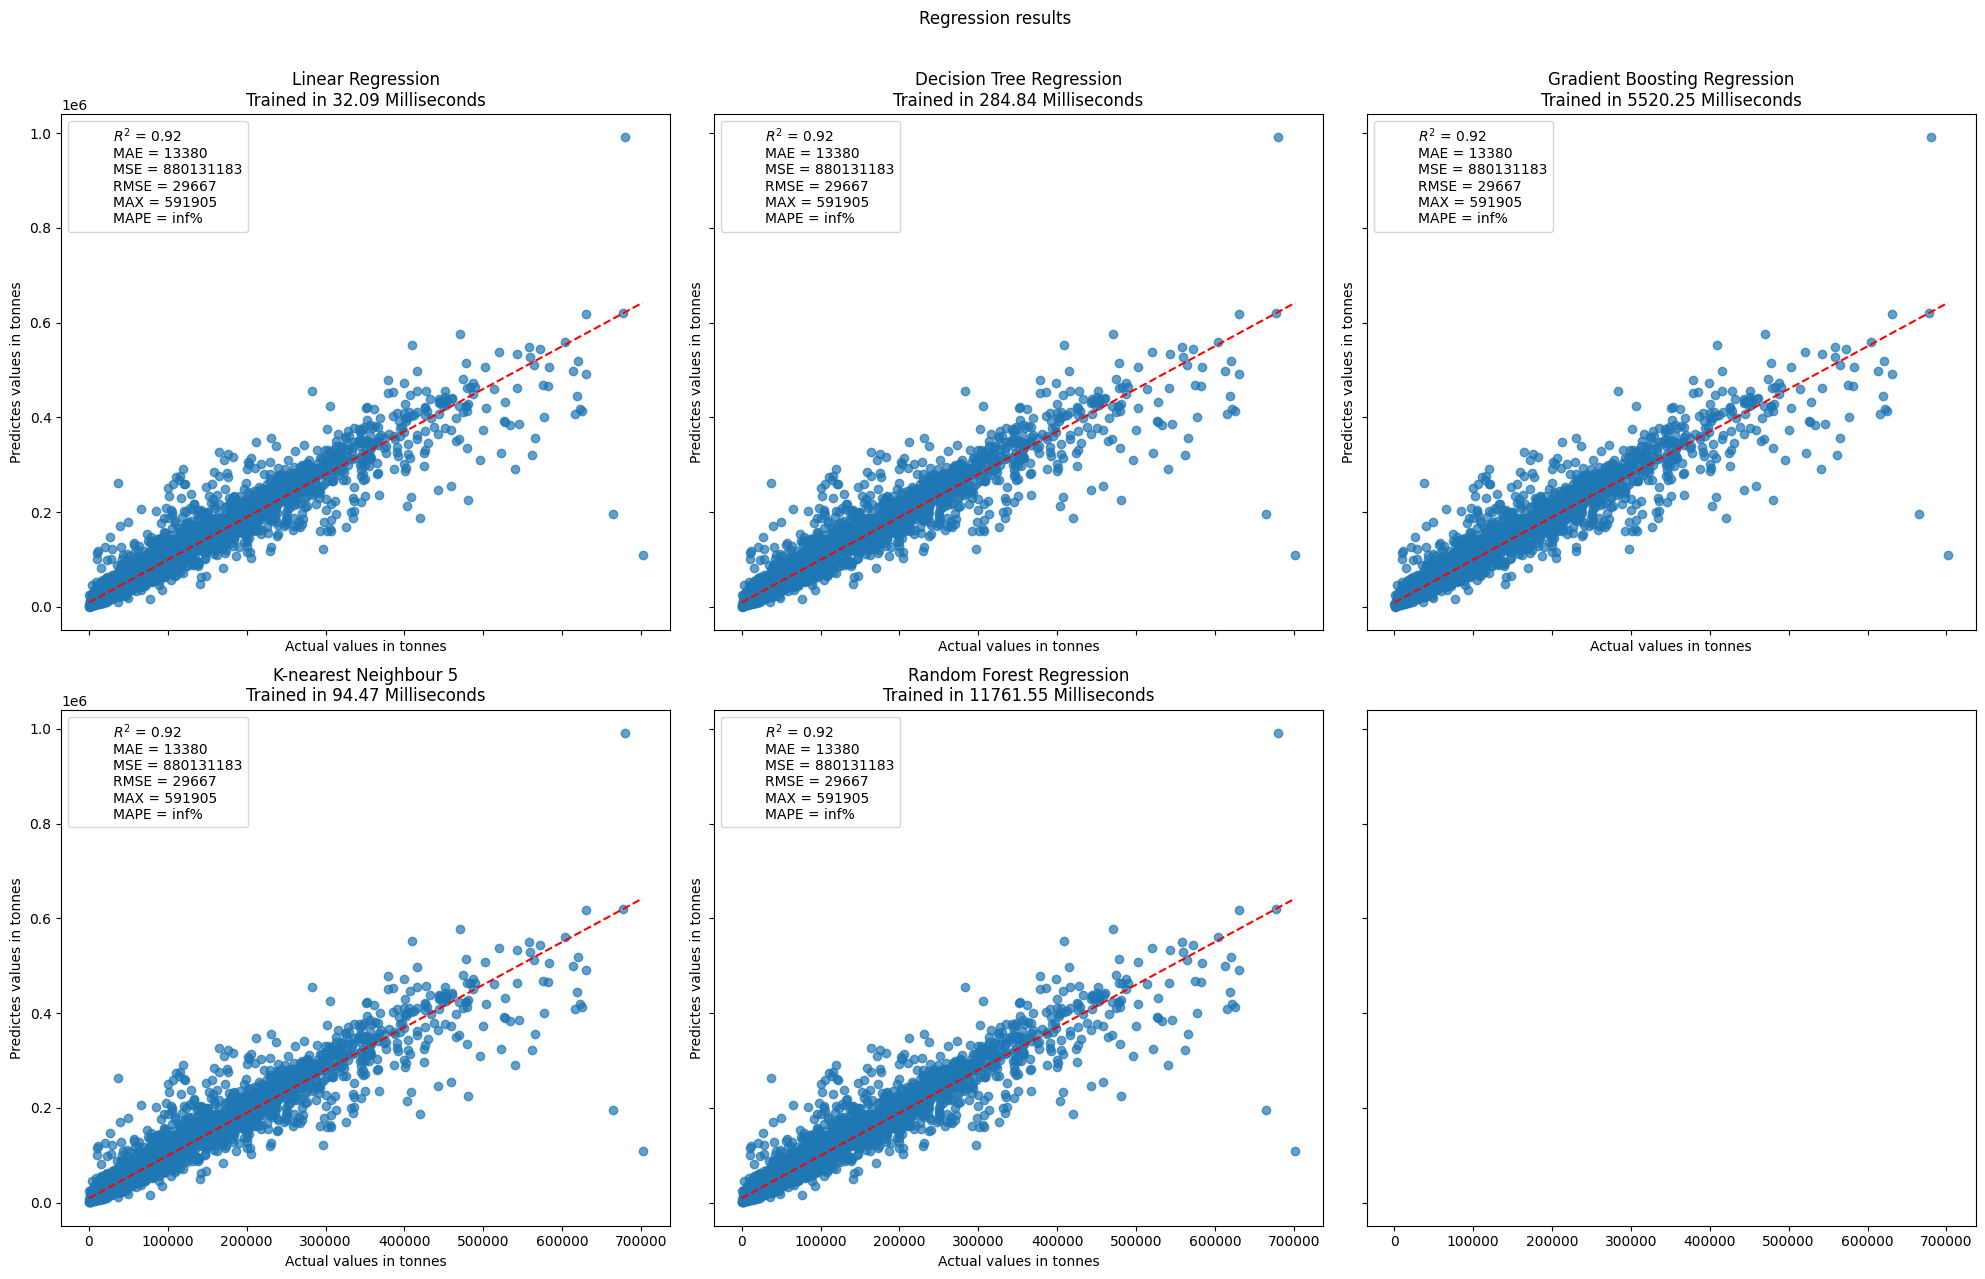

In [69]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

import time
from scipy.stats import linregress

lin = LinearRegression()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor()

estimators = [('Linear Regression', lin),
              ('Decision Tree Regression', dtr),
              ('Gradient Boosting Regression', gbr),
              ('K-nearest Neighbour 5', knn),
              ('Random Forest Regression', rfr)]

fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 13))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
  start_time = time.time()
  # Training the model
  est.fit(XX_train, yy_train)
  y_pred = est.predict(XX_test)
  estimated_time = time.time() - start_time
  print(y_pred)

  # View the model
  plot_regression_results(ax, yy_test, yy_pred, name, estimated_time,
                          (r'$R^2$ = {:.2f}' + '\n' +
                          r'MAE = {:.0f}' + '\n' +
                          r'MSE = {:.0f}' + '\n' +
                          r'RMSE = {:.0f}' + '\n' +
                          r'MAX = {:.0f}' + '\n' +
                          r'MAPE = {:.2f}%')
                          .format(r2_score(yy_test, yy_pred),
                                  mean_absolute_error(yy_test, yy_pred),
                                  mean_squared_error(yy_test, yy_pred),
                                  mean_squared_error(yy_test, yy_pred, squared=False),
                                  max_error(yy_test, yy_pred),
                                  mean_absolute_percentage_error(yy_test, yy_pred)))

plt.suptitle('Regression results')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

{'fit_time': array([0.02828455, 0.07174301, 0.05094194, 0.05251002, 0.02262998]), 'score_time': array([0.00799131, 0.01269007, 0.01553583, 0.00741887, 0.00799131]), 'test_r2': array([0.02935436, 0.02664932, 0.02990881, 0.01843999, 0.02549076]), 'test_max_error': array([-1577805.07177879,  -769948.31147792,  -816121.10079458,
       -1102320.98955164,  -599325.21353185]), 'test_neg_mean_absolute_error': array([-79434.03482555, -77580.17072967, -77867.09619739, -76934.16934887,
       -77303.35243339]), 'test_neg_mean_squared_error': array([-1.27033759e+10, -1.06856894e+10, -1.07894113e+10, -1.05496996e+10,
       -1.04547619e+10]), 'test_neg_root_mean_squared_error': array([-112709.25384187, -103371.60839238, -103872.09129279,
       -102711.73041251, -102248.53007662])}
{'fit_time': array([0.38064194, 0.29684901, 0.31382847, 0.34894228, 0.23856974]), 'score_time': array([0.0217495 , 0.00982213, 0.02067828, 0.02068567, 0.01094699]), 'test_r2': array([0.82112519, 0.87530312, 0.84883544, 

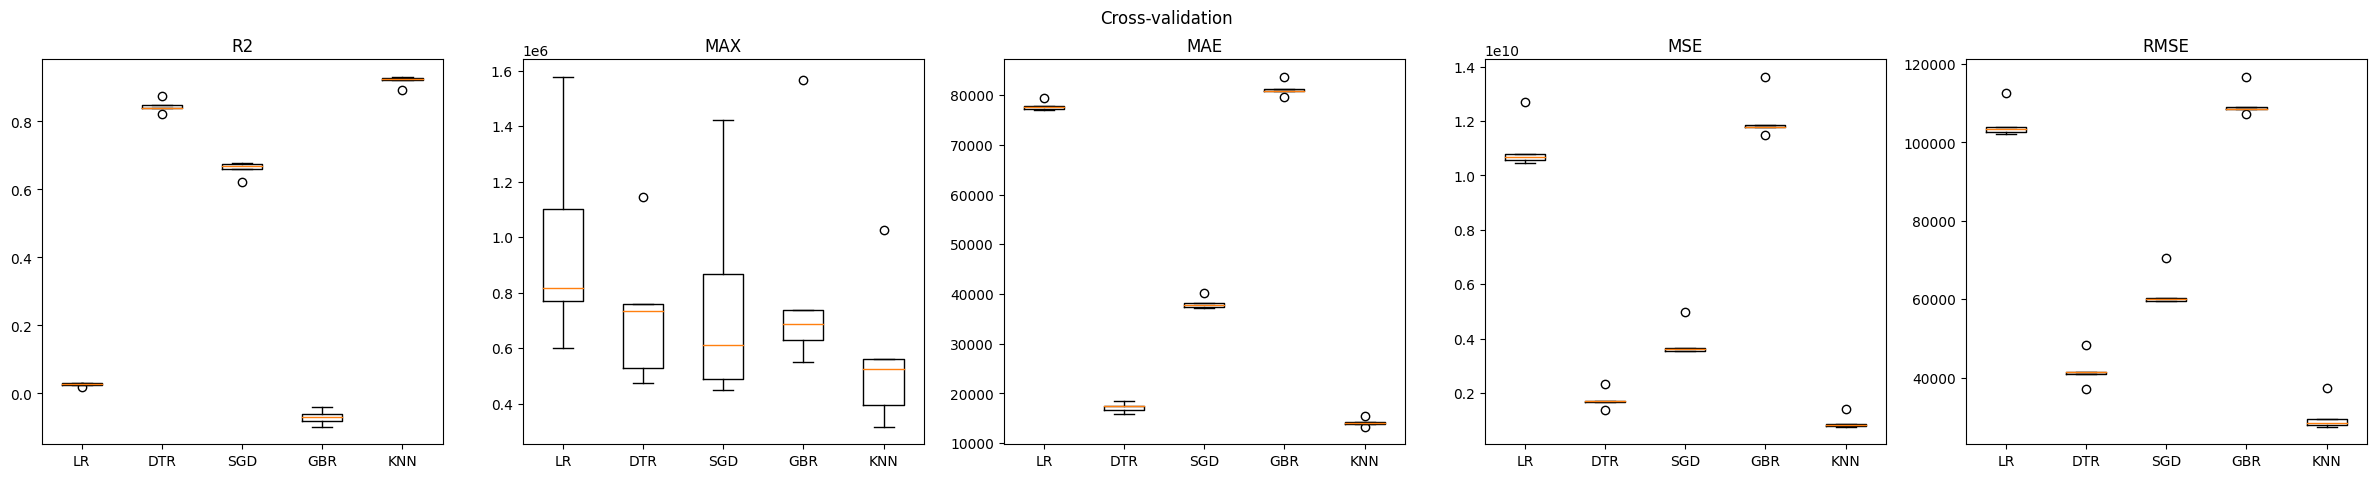

In [70]:
r2_values = []
max_error_values = []
neg_mean_absolute_error_values = []
neg_mean_squared_error_values = []
neg_root_mean_squared_error_values = []

for name, est in estimators:
    # Cross validation
    score = cross_validate(est, XX_train, yy_train, cv=5,
                           scoring=['r2', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                           n_jobs=-1)

    print(score)
    # Saving the values
    r2_values.append(score['test_r2'])
    max_error_values.append(-score['test_max_error'])
    neg_mean_absolute_error_values.append(-score['test_neg_mean_absolute_error'])
    neg_mean_squared_error_values.append(-score['test_neg_mean_squared_error'])
    neg_root_mean_squared_error_values.append(-score['test_neg_root_mean_squared_error'])

# Plotting the values
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

names = ['LR', 'DTR', 'SGD', 'GBR', 'KNN', 'RFR']
labels = names[:len(r2_values)]  # Use only the required number of labels

axs[0].boxplot(r2_values, labels=labels)
axs[0].set_title('R2')
axs[1].boxplot(max_error_values, labels=labels)
axs[1].set_title('MAX')
axs[2].boxplot(neg_mean_absolute_error_values, labels=labels)
axs[2].set_title('MAE')
axs[3].boxplot(neg_mean_squared_error_values, labels=labels)
axs[3].set_title('MSE')
axs[4].boxplot(neg_root_mean_squared_error_values, labels=labels)
axs[4].set_title('RMSE')

plt.suptitle('Cross-validation')
plt.show()

In [71]:
regression = 4  # Adjust the value of regression as needed

if regression < len(r2_values):
    print(u'R²: {:.3f} \u00B1 {:.3f}'.format(np.mean(r2_values[regression]), np.std(r2_values[regression])))
    print(u'MAX: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(max_error_values[regression]), np.std(max_error_values[regression])))
    print(u'MAE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_absolute_error_values[regression]), np.std(neg_mean_absolute_error_values[regression])))
    print(u'MSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_squared_error_values[regression]), np.std(neg_mean_squared_error_values[regression])))
    print(u'RMSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_root_mean_squared_error_values[regression]), np.std(neg_root_mean_squared_error_values[regression])))
else:
    print("Regression index is out of range, try lower. ")

R²: 0.920 ± 0.013
MAX: 565,227 ± 247,266
MAE: 14,154 ± 714
MSE: 923,759,153 ± 239,617,208
RMSE: 30,172 ± 3,664


# Saving the model

In [74]:
import pickle
from google.colab import files

# Save the trained model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

# Download the saved model file
files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>